In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
pd.options.display.max_columns = None

In [95]:
df = pd.read_csv('./data/occurrence_cleaned.txt')

In [96]:
df.head()

,eventDate,month,day,waterBody,countryCode,locality,species,dive_id,decimalLatitude,decimalLongitude,depth,orderKey,familyKey,genusKey,speciesKey
0,2019-05-29T10:06:00,5,29,South Pacific Ocean,WS,Taliga,Chelonia mydas,2422,-13.9387,-171.553,13.50,793.0,9413.0,2441864.0,2442225.0
1,2019-05-29T12:15:00,5,29,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2423,-13.9387,-171.553,10.20,793.0,9413.0,2442206.0,8841716.0
2,2019-05-29T12:15:00,5,29,South Pacific Ocean,WS,Cowabunga,Chelonia mydas,2423,-13.9387,-171.553,10.20,793.0,9413.0,2441864.0,2442225.0
3,2019-05-30T12:04:00,5,30,South Pacific Ocean,WS,Cowabunga,Chelonia mydas,2425,-13.9387,-171.553,9.75,793.0,9413.0,2441864.0,2442225.0
4,2019-05-30T10:02:00,5,30,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2424,-13.9387,-171.553,10.50,793.0,9413.0,2442206.0,8841716.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36726 entries, 0 to 36725
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventDate         36726 non-null  object 
 1   month             36726 non-null  int64  
 2   day               36726 non-null  int64  
 3   waterBody         36726 non-null  object 
 4   countryCode       36726 non-null  object 
 5   locality          36726 non-null  object 
 6   species           36726 non-null  object 
 7   dive_id           36726 non-null  int64  
 8   decimalLatitude   36726 non-null  float64
 9   decimalLongitude  36726 non-null  float64
 10  depth             36726 non-null  float64
 11  orderKey          36715 non-null  float64
 12  familyKey         36726 non-null  float64
 13  genusKey          36726 non-null  float64
 14  speciesKey        36726 non-null  float64
dtypes: float64(7), int64(3), object(5)
memory usage: 4.2+ MB


In [98]:
df_common_names = pd.read_csv('./data/common_names.csv')
df_common_names.shape

(3917, 9)

In [99]:
df_common_names.dropna(subset=['common_name_order','common_name_family','common_name_genus','common_name_species'], how='all', inplace=True)
df_common_names.drop('Unnamed: 0', inplace=True, axis=1)
df_common_names.shape

(3797, 8)

In [100]:
df_common_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 0 to 3916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   orderKey             3797 non-null   int64 
 1   familyKey            3797 non-null   int64 
 2   genusKey             3797 non-null   int64 
 3   speciesKey           3797 non-null   int64 
 4   common_name_order    3405 non-null   object
 5   common_name_family   3154 non-null   object
 6   common_name_genus    1447 non-null   object
 7   common_name_species  3238 non-null   object
dtypes: int64(4), object(4)
memory usage: 267.0+ KB


In [101]:
df_common_names['common_name_order'].value_counts()

perch-like fish              1392
decapod                       250
mail-cheeked fishes           189
cowfishes                     180
eel                           161
                             ... 
clam shrimps & waterfleas       1
heart urchin                    1
chimaera                        1
beroids                         1
crocodilian                     1
Name: common_name_order, Length: 86, dtype: int64

In [102]:
df_common_names['common_name_family'].value_counts()

groupers             146
rainbowfishes        128
damselfishes         115
goby                  92
firefishes            87
                    ... 
bump heads             1
keyhole limpets        1
sleeper shark          1
top snail              1
harlequin shrimps      1
Name: common_name_family, Length: 374, dtype: int64

In [103]:
df_common_names['common_name_genus'].value_counts()

common morays                52
butterflyfishes              51
groupers                     46
common snappers              44
parrotfishes                 32
                             ..
slime stars                   1
quahog                        1
bighead carps                 1
Purplestriped jellyfishes     1
river halfbeaks               1
Name: common_name_genus, Length: 396, dtype: int64

In [104]:
df_common_names.dropna(subset=['common_name_family'])\
               [df_common_names.dropna(subset=['common_name_family'])['common_name_family'].str.contains('moray')]

,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species
2,495,2953,2404390,2404391,eel,moray eels,NaN,Brummer's moray
3,495,2953,2403463,2403808,eel,moray eels,common morays,Blackpearl moray
91,495,2953,2403463,2403964,eel,moray eels,common morays,green moray
146,495,2953,2403463,2403789,eel,moray eels,common morays,painted moray
158,495,2953,2403463,2404065,eel,moray eels,common morays,spotted moray
...,...,...,...,...,...,...,...,...
3535,495,2953,2403463,2403798,eel,moray eels,common morays,polygon moray
3600,495,2953,2403463,2403870,eel,moray eels,common morays,masked moray
3671,495,2953,2403463,2403993,eel,moray eels,common morays,white-edged moray
3747,495,2953,-1,-1,eel,moray eels,NaN,NaN


In [105]:
df_common_names[(df_common_names['common_name_family'].isna()) & 
               (~df_common_names['common_name_genus'].isna())]

,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species
39,980,7041,2292460,5859647,sea slug,NaN,atromaculata leopard nudibranch,Swiss cow nudibranch
256,560,7740,3195825,5422479,NaN,NaN,Kelp,"oarweed, tangle"
268,7431046,2251555,7464943,5183631,NaN,NaN,boring sponges,boring sponge
301,980,6561,2292101,2292107,sea slug,NaN,doris,hairy spiny doris
376,714,8153,7673664,5184681,stony coral,NaN,horn corals,staghorn coral
...,...,...,...,...,...,...,...,...
3742,714,8219,2260060,5184733,stony coral,NaN,brain coral,lesser valley coral
3753,714,8153,7673664,-1,stony coral,NaN,horn corals,NaN
3850,705,5688,8424301,2256565,sea anemone,NaN,Sea anemone,strawberry anemone
3874,1437,8198,2258179,-1,soft corals,NaN,sea fans,NaN


In [106]:
df_common_names[(df_common_names['common_name_family'].isna()) & 
               (~df_common_names['common_name_order'].isna())]

,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species
4,980,7046,2292371,4596863,sea slug,NaN,NaN,NaN
11,980,4304701,2292240,2292241,sea slug,NaN,NaN,hermissenda
12,537,4287106,2353403,7193779,leporins,NaN,NaN,NaN
17,459,6835,2289226,2289632,octopus,NaN,NaN,NaN
33,980,6560,4359787,4359788,sea slug,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3901,980,6556,2291830,2291831,sea slug,NaN,NaN,sargassum nudibranch
3904,496,-1,-1,-1,silverside,NaN,NaN,NaN
3906,1437,7313,1002810,-1,soft corals,NaN,organ-pipe corals,NaN
3910,980,6560,-1,-1,sea slug,NaN,NaN,NaN


In [107]:
df_common_names[df_common_names['common_name_order'] == 'octopus']

,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species
17,459,6835,2289226,2289632,octopus,NaN,NaN,NaN
81,459,6833,2289247,2289252,octopus,NaN,NaN,NaN
191,459,6835,2289226,2289506,octopus,NaN,NaN,NaN
223,459,6835,2289226,2289671,octopus,NaN,NaN,common octopus
233,459,6835,2289226,-1,octopus,NaN,NaN,NaN
286,459,6833,2289247,2289258,octopus,NaN,NaN,NaN
372,459,3444,2289296,5189592,octopus,NaN,NaN,Telescope octopus
442,459,6835,2289226,2289544,octopus,NaN,NaN,NaN
472,459,6833,2289247,2289260,octopus,NaN,NaN,Japanese pancake devilfishes
524,459,6835,2289226,2289640,octopus,NaN,NaN,Sydney octopus


In [108]:
df_common_names['common_name'] = df_common_names['common_name_family']
df_common_names.loc[df_common_names['common_name'].isna(), 'common_name'] = df_common_names.loc[df_common_names['common_name'].isna()]['common_name_order']

In [109]:
len(df_common_names), df_common_names['common_name'].isna().sum()

(3797, 156)

In [110]:
df_common_names.loc[df_common_names['common_name'].isna(), 'common_name'] = df_common_names.loc[df_common_names['common_name'].isna()]['common_name_genus']
len(df_common_names), df_common_names['common_name'].isna().sum()

(3797, 140)

In [111]:
df_common_names.loc[df_common_names['common_name'].isna(), 'common_name'] = df_common_names.loc[df_common_names['common_name'].isna()]['common_name_species']
len(df_common_names), df_common_names['common_name'].isna().sum()

(3797, 0)

In [112]:
df_common_names['common_name'].value_counts()

groupers         146
rainbowfishes    128
damselfishes     115
stony coral      114
sea slug          99
                ... 
pearl perches      1
golfingiids        1
loaches            1
heptapterids       1
lolly fish         1
Name: common_name, Length: 571, dtype: int64

In [113]:
df_common_names['common_name'] = df_common_names['common_name'].str.capitalize()

In [114]:
df_common_names.dropna(subset=['common_name_order'])[df_common_names.dropna(subset=['common_name_order'])['common_name_order'].str.contains('coral')]

,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species,common_name
36,714,3950,7876869,9783587,stony coral,cup corals,NaN,NaN,Cup corals
138,714,7526997,2260569,2260570,stony coral,NaN,NaN,octopus coral,Stony coral
221,1437,3933,2238567,5185175,soft corals,alcyoniids,NaN,dead man's fingers,Alcyoniids
261,1242,8181,2256373,2260700,coral anemones,NaN,NaN,jewel anemone,Coral anemones
305,1437,3958,4878948,9809158,soft corals,NaN,NaN,NaN,Soft corals
...,...,...,...,...,...,...,...,...,...
3807,831,-1,-1,-1,black coral,NaN,NaN,NaN,Black coral
3829,1437,3933,-1,-1,soft corals,alcyoniids,NaN,NaN,Alcyoniids
3874,1437,8198,2258179,-1,soft corals,NaN,sea fans,NaN,Soft corals
3906,1437,7313,1002810,-1,soft corals,NaN,organ-pipe corals,NaN,Soft corals


In [115]:
df_common_names.dropna(subset=['common_name_order'])[df_common_names.dropna(subset=['common_name_order'])['common_name_order'].str.contains('anemon')]

,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species,common_name
122,705,9220,2256991,2257005,sea anemone,NaN,NaN,giant anemone,Sea anemone
246,705,5688,2256131,2256644,sea anemone,NaN,NaN,snakelocks anemone,Sea anemone
261,1242,8181,2256373,2260700,coral anemones,NaN,NaN,jewel anemone,Coral anemones
407,705,5688,2256131,2256631,sea anemone,NaN,NaN,NaN,Sea anemone
775,705,9220,2256762,5184183,sea anemone,NaN,NaN,magnificent sea anemone,Sea anemone
789,705,5141,2257814,2257817,sea anemone,NaN,NaN,fountain anemone,Sea anemone
950,705,5141,2257814,2257843,sea anemone,NaN,NaN,small snakelocks anemone,Sea anemone
1076,705,5688,8424301,2256559,sea anemone,NaN,Sea anemone,beadlet anemone,Sea anemone
1097,705,5141,2255718,2257884,sea anemone,NaN,NaN,mud sagartia,Sea anemone
1138,705,9214,2255724,5183974,sea anemone,NaN,NaN,clonal plumose anemone,Sea anemone


In [116]:
#Assign common name to each observation
df = df.merge(df_common_names, how='left', on=['orderKey','familyKey','genusKey','speciesKey'])

In [117]:
df['common_name'].isna().sum()

257

#Target
max_species = df['common_name'].str.strip().value_counts().index[0]
df['target'] = (df['common_name'] == max_species).astype(int)

df['target'].sum()

df_agg = df.groupby('common_name').count().sort_values(by='eventDate', ascending=False)[['eventDate']]
#df_agg[df_agg['eventDate'] > 500]
targets = df_agg[df_agg['eventDate'] > 500].reset_index()['common_name'].str.capitalize()
targets

In [118]:
df_agg = df.groupby('common_name').count().sort_values(by='eventDate', ascending=False)[['eventDate']]
#df_agg[df_agg['eventDate'] > 500]
targets = df_agg[:5].reset_index()['common_name'].str.capitalize()
targets

0      Moray eels
1      Firefishes
2    Damselfishes
3     Sea turtles
4        Groupers
Name: common_name, dtype: object

In [119]:
def assign_targets(column, common_name):
    return int(column == common_name)
        
for target in targets:
    df['{}'.format(target)] = df.apply(lambda row: assign_targets(row['common_name'], target), axis=1)

df

,eventDate,month,day,waterBody,countryCode,locality,species,dive_id,decimalLatitude,decimalLongitude,depth,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species,common_name,Moray eels,Firefishes,Damselfishes,Sea turtles,Groupers
0,2019-05-29T10:06:00,5,29,South Pacific Ocean,WS,Taliga,Chelonia mydas,2422,-13.9387,-171.553,13.500,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0
1,2019-05-29T12:15:00,5,29,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2423,-13.9387,-171.553,10.200,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0
2,2019-05-29T12:15:00,5,29,South Pacific Ocean,WS,Cowabunga,Chelonia mydas,2423,-13.9387,-171.553,10.200,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0
3,2019-05-30T12:04:00,5,30,South Pacific Ocean,WS,Cowabunga,Chelonia mydas,2425,-13.9387,-171.553,9.750,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0
4,2019-05-30T10:02:00,5,30,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2424,-13.9387,-171.553,10.500,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36721,2015-02-24T09:06:00,2,24,South Pacific Ocean,FJ,Barracuda Hole,Scomberomorus brasiliensis,1125,-16.7868,179.918,13.870,587.0,8596.0,2374232.0,2374270.0,perch-like fish,albacores,Spanish mackerels,serra,Albacores,0,0,0,0,0
36722,2015-02-26T11:22:00,2,26,South Pacific Ocean,FJ,Annie's Bommie,Heteroconger hassi,1123,-16.7861,179.924,12.210,495.0,2951.0,2403127.0,2403157.0,eel,conger eel,garden eel,Black spotted garden eel,Conger eel,0,0,0,0,0
36723,2015-02-25T08:54:00,2,25,South Pacific Ocean,FJ,Yellow Tunnel,Naso lituratus,1126,-16.7861,179.924,12.790,587.0,4233.0,2379541.0,5209096.0,perch-like fish,surgeonfishes,nosefishes,striped-face unicornfish,Surgeonfishes,0,0,0,0,0
36724,2015-02-25T10:51:00,2,25,South Pacific Ocean,FJ,Rainbow Passage,Mobula alfredi,1124,-16.7861,179.924,12.955,8214029.0,2193.0,2419178.0,9241141.0,stingray,eagle ray,devil ray,Alfred manta,Eagle ray,0,0,0,0,0


In [120]:
df[df['Groupers'] == 1]

,eventDate,month,day,waterBody,countryCode,locality,species,dive_id,decimalLatitude,decimalLongitude,depth,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species,common_name,Moray eels,Firefishes,Damselfishes,Sea turtles,Groupers
11,2015-07-13T09:10:00,7,13,Hidden Lake,EG,Sunrise Grand Select Montemare Resort House Reef,Plectropomus leopardus,7169,53.8635,-166.049,10.500,587.0,8597.0,8252335.0,5210114.0,perch-like fish,groupers,NaN,bluedotted coraltrout,Groupers,0,0,0,0,1
19,2013-07-15T09:00:00,7,15,South Pacific Ocean,CK,Papua Passage,Cephalopholis argus,5941,-21.2808,-159.808,6.000,587.0,8597.0,2388808.0,2388891.0,perch-like fish,groupers,NaN,peacock hind,Groupers,0,0,0,0,1
171,2014-02-23T10:17:00,2,23,South Pacific Ocean,US,Kahe Point Beach Park,Cephalopholis argus,4874,21.3540,-158.130,4.400,587.0,8597.0,2388808.0,2388891.0,perch-like fish,groupers,NaN,peacock hind,Groupers,0,0,0,0,1
535,2013-10-27T12:46:00,10,27,North Pacific Ocean,US,Palea Point,Cephalopholis argus,4862,21.2687,-157.689,11.600,587.0,8597.0,2388808.0,2388891.0,perch-like fish,groupers,NaN,peacock hind,Groupers,0,0,0,0,1
542,2013-05-23T10:10:00,5,23,Pacific Ocean,US,Koko Craters,Plectranthias nanus,7715,21.2849,-157.681,5.790,587.0,8597.0,2387984.0,2388039.0,perch-like fish,groupers,NaN,Bownband perchlet,Groupers,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36493,2013-12-23T11:51:00,12,23,"Poor Knights Islands, NZ",NZ,Brady's Corner / Bigeye Cave,Trachypoma macracanthus,8088,-35.4786,174.739,6.500,587.0,8597.0,2343344.0,5210083.0,perch-like fish,groupers,NaN,Pacific perch,Groupers,0,0,0,0,1
36498,2013-12-23T11:51:00,12,23,"Poor Knights Islands, NZ",NZ,Brady's Corner / Bigeye Cave,Trachypoma macracanthus,4181,-35.4786,174.739,6.500,587.0,8597.0,2343344.0,5210083.0,perch-like fish,groupers,NaN,Pacific perch,Groupers,0,0,0,0,1
36595,2013-08-02T09:11:00,8,2,South Pacific Ocean,FJ,Shark Reef,Cephalopholis argus,4815,-18.2641,178.069,12.955,587.0,8597.0,2388808.0,2388891.0,perch-like fish,groupers,NaN,peacock hind,Groupers,0,0,0,0,1
36666,2013-06-17T18:55:00,6,17,South Pacific Ocean,FJ,Shark Reef Marine Reserve,Cephalopholis argus,8924,-18.1731,178.156,9.000,587.0,8597.0,2388808.0,2388891.0,perch-like fish,groupers,NaN,peacock hind,Groupers,0,0,0,0,1


In [121]:
#Aggregate rows by inmersion
#If the most popular species is seen during the dive, then target is equal to 1
df_count_target = df.groupby('dive_id')[targets].sum().reset_index()

for target in targets:
    df_count_target.loc[df_count_target[target] >= 1, target] = 1

df_unique = df.drop_duplicates(subset='dive_id')
df_unique.drop(targets, axis=1, inplace=True)

df = df_unique.merge(df_count_target, how='left', on='dive_id')
df

/home/davidgp/anaconda3/envs/malif/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,eventDate,month,day,waterBody,countryCode,locality,species,dive_id,decimalLatitude,decimalLongitude,depth,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species,common_name,Moray eels,Firefishes,Damselfishes,Sea turtles,Groupers
0,2019-05-29T10:06:00,5,29,South Pacific Ocean,WS,Taliga,Chelonia mydas,2422,-13.9387,-171.553,13.500,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0
1,2019-05-29T12:15:00,5,29,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2423,-13.9387,-171.553,10.200,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0
2,2019-05-30T12:04:00,5,30,South Pacific Ocean,WS,Cowabunga,Chelonia mydas,2425,-13.9387,-171.553,9.750,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0
3,2019-05-30T10:02:00,5,30,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2424,-13.9387,-171.553,10.500,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0
4,2015-07-22T18:56:00,7,22,Hidden Lake,EG,Sunrise Grand Select Montemare Resort House Reef,Scarus psittacus,7258,53.8635,-166.049,10.000,587.0,4504.0,2371535.0,2393800.0,perch-like fish,parrotfishes,parrotfishes,Palenose parrotfish,Parrotfishes,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,2015-02-24T09:06:00,2,24,South Pacific Ocean,FJ,Barracuda Hole,Triaenodon obesus,1125,-16.7868,179.918,13.870,887.0,2211.0,2418205.0,2418054.0,ground shark,requiem shark,NaN,whitetip reef shark,Requiem shark,0,0,0,0,0
11569,2015-02-26T11:22:00,2,26,South Pacific Ocean,FJ,Annie's Bommie,Heteroconger hassi,1123,-16.7861,179.924,12.210,495.0,2951.0,2403127.0,2403157.0,eel,conger eel,garden eel,Black spotted garden eel,Conger eel,0,0,0,0,0
11570,2015-02-25T08:54:00,2,25,South Pacific Ocean,FJ,Yellow Tunnel,Naso lituratus,1126,-16.7861,179.924,12.790,587.0,4233.0,2379541.0,5209096.0,perch-like fish,surgeonfishes,nosefishes,striped-face unicornfish,Surgeonfishes,0,0,0,0,0
11571,2015-02-25T10:51:00,2,25,South Pacific Ocean,FJ,Rainbow Passage,Mobula alfredi,1124,-16.7861,179.924,12.955,8214029.0,2193.0,2419178.0,9241141.0,stingray,eagle ray,devil ray,Alfred manta,Eagle ray,0,0,0,0,0


In [122]:
suma = []
for target in targets:
    suma.append(df_count_target[df_count_target[target] == 1][target].count())
    
sum(suma)

6768

In [123]:
#Extract hours from eventDate column
df['hour'] = df['eventDate'].str.split('T')[:].str[1].str.split(':').str[0].astype('int')
df.head()

,eventDate,month,day,waterBody,countryCode,locality,species,dive_id,decimalLatitude,decimalLongitude,depth,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species,common_name,Moray eels,Firefishes,Damselfishes,Sea turtles,Groupers,hour
0,2019-05-29T10:06:00,5,29,South Pacific Ocean,WS,Taliga,Chelonia mydas,2422,-13.9387,-171.553,13.50,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0,10
1,2019-05-29T12:15:00,5,29,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2423,-13.9387,-171.553,10.20,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0,12
2,2019-05-30T12:04:00,5,30,South Pacific Ocean,WS,Cowabunga,Chelonia mydas,2425,-13.9387,-171.553,9.75,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0,12
3,2019-05-30T10:02:00,5,30,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2424,-13.9387,-171.553,10.50,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0,10
4,2015-07-22T18:56:00,7,22,Hidden Lake,EG,Sunrise Grand Select Montemare Resort House Reef,Scarus psittacus,7258,53.8635,-166.049,10.00,587.0,4504.0,2371535.0,2393800.0,perch-like fish,parrotfishes,parrotfishes,Palenose parrotfish,Parrotfishes,0,1,0,0,0,18


In [124]:
#Convert hour, day and month to sine and cosine
def to_sin(df, column):
    df[column+'_sin'] = df.apply(lambda row: np.sin(2*np.pi*row[column]/24), axis=1)
    
def to_cos(df, column):
    df[column+'_cos'] = df.apply(lambda row: np.cos(2*np.pi*row[column]/24), axis=1)

In [125]:
to_sin(df, 'hour')
to_cos(df, 'hour')
to_sin(df, 'day')
to_cos(df, 'day')
to_sin(df, 'month')
to_cos(df, 'month')

In [126]:
df

,eventDate,month,day,waterBody,countryCode,locality,species,dive_id,decimalLatitude,decimalLongitude,depth,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species,common_name,Moray eels,Firefishes,Damselfishes,Sea turtles,Groupers,hour,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,2019-05-29T10:06:00,5,29,South Pacific Ocean,WS,Taliga,Chelonia mydas,2422,-13.9387,-171.553,13.500,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0,10,5.000000e-01,-8.660254e-01,9.659258e-01,2.588190e-01,9.659258e-01,0.258819
1,2019-05-29T12:15:00,5,29,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2423,-13.9387,-171.553,10.200,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0,12,1.224647e-16,-1.000000e+00,9.659258e-01,2.588190e-01,9.659258e-01,0.258819
2,2019-05-30T12:04:00,5,30,South Pacific Ocean,WS,Cowabunga,Chelonia mydas,2425,-13.9387,-171.553,9.750,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0,12,1.224647e-16,-1.000000e+00,1.000000e+00,1.194340e-15,9.659258e-01,0.258819
3,2019-05-30T10:02:00,5,30,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2424,-13.9387,-171.553,10.500,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0,10,5.000000e-01,-8.660254e-01,1.000000e+00,1.194340e-15,9.659258e-01,0.258819
4,2015-07-22T18:56:00,7,22,Hidden Lake,EG,Sunrise Grand Select Montemare Resort House Reef,Scarus psittacus,7258,53.8635,-166.049,10.000,587.0,4504.0,2371535.0,2393800.0,perch-like fish,parrotfishes,parrotfishes,Palenose parrotfish,Parrotfishes,0,1,0,0,0,18,-1.000000e+00,-1.836970e-16,-5.000000e-01,8.660254e-01,9.659258e-01,-0.258819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,2015-02-24T09:06:00,2,24,South Pacific Ocean,FJ,Barracuda Hole,Triaenodon obesus,1125,-16.7868,179.918,13.870,887.0,2211.0,2418205.0,2418054.0,ground shark,requiem shark,NaN,whitetip reef shark,Requiem shark,0,0,0,0,0,9,7.071068e-01,-7.071068e-01,-2.449294e-16,1.000000e+00,5.000000e-01,0.866025
11569,2015-02-26T11:22:00,2,26,South Pacific Ocean,FJ,Annie's Bommie,Heteroconger hassi,1123,-16.7861,179.924,12.210,495.0,2951.0,2403127.0,2403157.0,eel,conger eel,garden eel,Black spotted garden eel,Conger eel,0,0,0,0,0,11,2.588190e-01,-9.659258e-01,5.000000e-01,8.660254e-01,5.000000e-01,0.866025
11570,2015-02-25T08:54:00,2,25,South Pacific Ocean,FJ,Yellow Tunnel,Naso lituratus,1126,-16.7861,179.924,12.790,587.0,4233.0,2379541.0,5209096.0,perch-like fish,surgeonfishes,nosefishes,striped-face unicornfish,Surgeonfishes,0,0,0,0,0,8,8.660254e-01,-5.000000e-01,2.588190e-01,9.659258e-01,5.000000e-01,0.866025
11571,2015-02-25T10:51:00,2,25,South Pacific Ocean,FJ,Rainbow Passage,Mobula alfredi,1124,-16.7861,179.924,12.955,8214029.0,2193.0,2419178.0,9241141.0,stingray,eagle ray,devil ray,Alfred manta,Eagle ray,0,0,0,0,0,10,5.000000e-01,-8.660254e-01,2.588190e-01,9.659258e-01,5.000000e-01,0.866025


#Obtain day of week
df['weekday'] = pd.to_datetime(df['eventDate']).dt.weekday
df.head()

In [127]:
#Mean target encoder for categorical columns
cat_cols = ['waterBody', 'locality', 'countryCode']
me = TargetEncoder()
me.fit(df[cat_cols], df['Moray eels'])
df_cat = me.transform(df[cat_cols])

/home/davidgp/anaconda3/envs/malif/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [128]:
for column in df_cat.columns:
    df[column+'_m'] = df_cat[column]

In [129]:
df.head()

,eventDate,month,day,waterBody,countryCode,locality,species,dive_id,decimalLatitude,decimalLongitude,depth,orderKey,familyKey,genusKey,speciesKey,common_name_order,common_name_family,common_name_genus,common_name_species,common_name,Moray eels,Firefishes,Damselfishes,Sea turtles,Groupers,hour,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,waterBody_m,locality_m,countryCode_m
0,2019-05-29T10:06:00,5,29,South Pacific Ocean,WS,Taliga,Chelonia mydas,2422,-13.9387,-171.553,13.50,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0,10,5.000000e-01,-8.660254e-01,0.965926,2.588190e-01,0.965926,0.258819,0.145299,0.151560,0.007188
1,2019-05-29T12:15:00,5,29,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2423,-13.9387,-171.553,10.20,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0,12,1.224647e-16,-1.000000e+00,0.965926,2.588190e-01,0.965926,0.258819,0.145299,0.018066,0.007188
2,2019-05-30T12:04:00,5,30,South Pacific Ocean,WS,Cowabunga,Chelonia mydas,2425,-13.9387,-171.553,9.75,793.0,9413.0,2441864.0,2442225.0,turtle,Sea Turtles,green sea turtle,Green turtle,Sea turtles,0,0,0,1,0,12,1.224647e-16,-1.000000e+00,1.000000,1.194340e-15,0.965926,0.258819,0.145299,0.018066,0.007188
3,2019-05-30T10:02:00,5,30,South Pacific Ocean,WS,Cowabunga,Eretmochelys imbricata,2424,-13.9387,-171.553,10.50,793.0,9413.0,2442206.0,8841716.0,turtle,Sea Turtles,Hawksbill Sea Turtles,Hawksbill turtle,Sea turtles,0,0,0,1,0,10,5.000000e-01,-8.660254e-01,1.000000,1.194340e-15,0.965926,0.258819,0.145299,0.018066,0.007188
4,2015-07-22T18:56:00,7,22,Hidden Lake,EG,Sunrise Grand Select Montemare Resort House Reef,Scarus psittacus,7258,53.8635,-166.049,10.00,587.0,4504.0,2371535.0,2393800.0,perch-like fish,parrotfishes,parrotfishes,Palenose parrotfish,Parrotfishes,0,1,0,0,0,18,-1.000000e+00,-1.836970e-16,-0.500000,8.660254e-01,0.965926,-0.258819,0.018066,0.018066,0.213318


In [130]:
#Standardize
sc = StandardScaler()
df['depth_s'] = sc.fit_transform(df[['depth']])

In [131]:
#Split data in X and y
X = df.drop(columns=targets)
y = df['Moray eels']

In [132]:
X.columns

Index(['eventDate', 'month', 'day', 'waterBody', 'countryCode', 'locality',
       'species', 'dive_id', 'decimalLatitude', 'decimalLongitude', 'depth',
       'orderKey', 'familyKey', 'genusKey', 'speciesKey', 'common_name_order',
       'common_name_family', 'common_name_genus', 'common_name_species',
       'common_name', 'hour', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos',
       'month_sin', 'month_cos', 'waterBody_m', 'locality_m', 'countryCode_m',
       'depth_s'],
      dtype='object')

In [133]:
categorical_columns = ['waterBody_m', 'locality_m', 'countryCode_m']
numerical_columns = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'depth']

In [134]:
# Chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X[categorical_columns], y)
X_fs = fs.transform(X[categorical_columns])

Feature waterBody_m score: 71.586379 p_valor: 2.6538234587999593e-17
Feature locality_m score: 644.853210 p_valor: 2.9406498406202893e-142
Feature countryCode_m score: 38.166415 p_valor: 6.496096414998152e-10


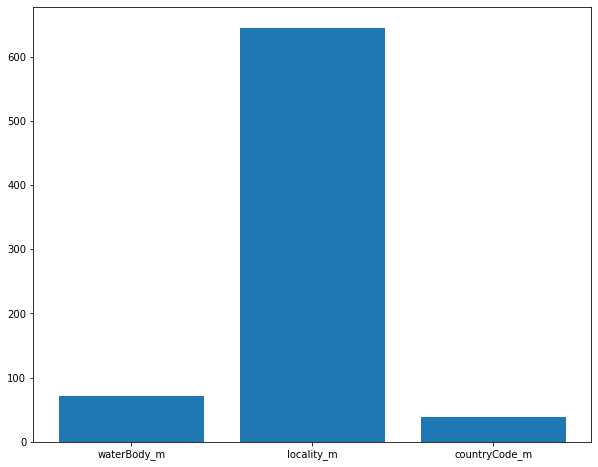

In [135]:
for i,col in enumerate(categorical_columns):
    print('Feature %s score: %f p_valor: %s' % (col, fs.scores_[i], fs.pvalues_[i]))

plt.figure(figsize=(10,8))
plt.bar(categorical_columns, fs.scores_)
plt.show()

In [136]:
# Mutual information
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X[categorical_columns], y)
X_fs = fs.transform(X[categorical_columns])

Feature waterBody_m 0.053513
Feature locality_m 0.144400
Feature countryCode_m 0.040225


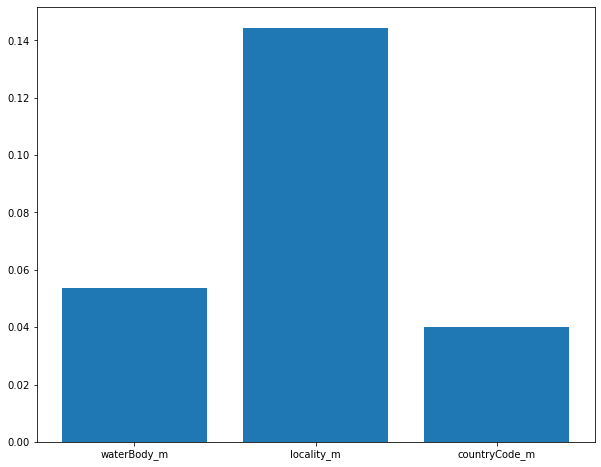

In [137]:
# The highest, the more dependency
for i,col in enumerate(categorical_columns):
    print('Feature %s %f' % (col, fs.scores_[i]))

plt.figure(figsize=(10,8))
plt.bar(categorical_columns, fs.scores_)
plt.show()

In [138]:
#Anova
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X[numerical_columns], y)
X_fs = fs.transform(X[numerical_columns])

Feature hour_sin score: 3.827688 p_valor: 0.050436452244447004
Feature hour_cos score: 0.350189 p_valor: 0.554017464833147
Feature day_sin score: 0.017574 p_valor: 0.8945393650319613
Feature day_cos score: 9.534899 p_valor: 0.002020783374867911
Feature month_sin score: 17.317262 p_valor: 3.185880290216238e-05
Feature month_cos score: 1.392312 p_valor: 0.23803927703124775
Feature depth score: 66.808370 p_valor: 3.303389947248444e-16


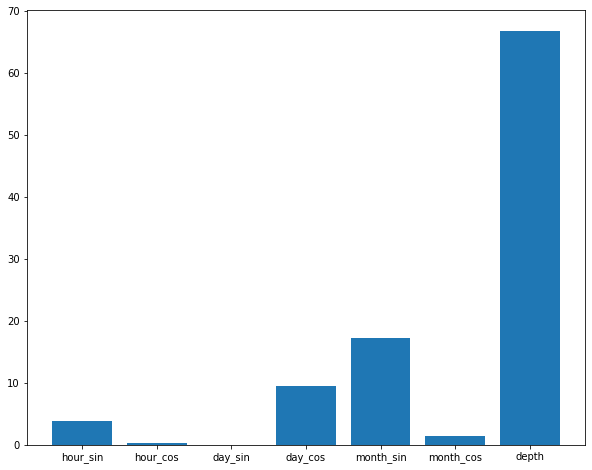

In [139]:
for i,col in enumerate(numerical_columns):
    print('Feature %s score: %f p_valor: %s' % (col, fs.scores_[i], fs.pvalues_[i]))

plt.figure(figsize=(10,8))
plt.bar(numerical_columns, fs.scores_)
plt.show()

In [140]:
#Export dataframe
#columns = ['decimalLatitude', 'decimalLongitude', 'waterBody', 'locality', 'countryCode', 'hour_sin',
#           'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'depth'] + list(targets.values)
columns = ['decimalLatitude', 'decimalLongitude', 'waterBody', 'locality', 'countryCode', 'hour',
           'day', 'month', 'depth'] + list(targets.values)

df = df[columns]
df.to_csv('./data/occurrence_selected.txt', index=False)